In [2]:
%matplotlib inline
import pandas as pd
import seaborn as sbn
sbn.set()

In [3]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [4]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,Deli,1952
1,Fury,1923
2,Petticoat Pirates,1961
3,Hvem myrder hvem?,1978
4,MVP: Most Valuable Primate,2000


In [5]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

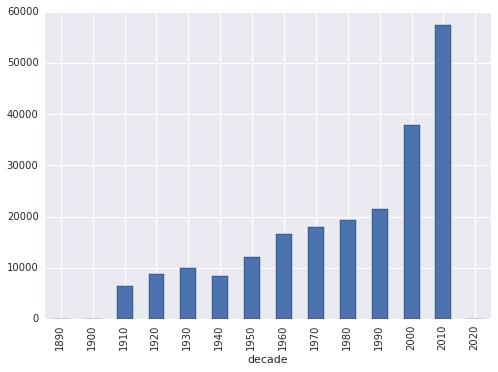

In [8]:
titles['decade'] = titles.year // 10 * 10
titles.groupby("decade").size().plot(kind="bar")

### Use groupby() to plot the number of "Hamlet" films made each decade.

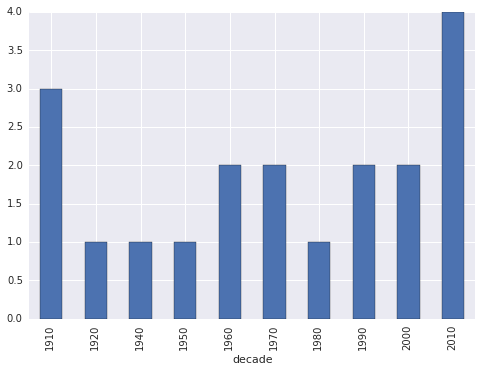

In [9]:
titles['decade'] = titles.year // 10 * 10
c = titles[titles.title=="Hamlet"]
c.groupby("decade").size().plot(kind="bar")

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [50]:
c = cast[(cast.year//10 == 195) & (cast.n == 1)]
d = c.groupby(['year', 'type']).size()
d

year  type   
1950  actor      604
      actress    271
1951  actor      633
      actress    272
1952  actor      591
      actress    284
1953  actor      634
      actress    291
1954  actor      627
      actress    298
1955  actor      606
      actress    265
1956  actor      614
      actress    287
1957  actor      708
      actress    284
1958  actor      695
      actress    275
1959  actor      678
      actress    287
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

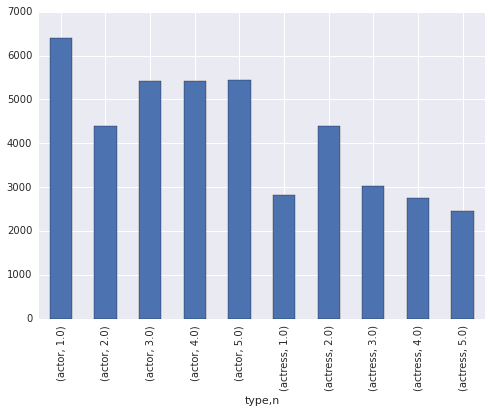

In [49]:
c = cast[(cast.year//10 == 195) & (cast.n <= 5)]
d = c.groupby(['type', 'n']).size().plot(kind="bar")
d

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [27]:
year = cast[cast.title=="The Pink Panther"].groupby(["year"])["n"].max()
year



year
1963    15
2006    50
Name: n, dtype: float64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [49]:
c = cast[cast.name=="Frank Oz"]
c = c.groupby(["year", "title"])
c.size()

year  title                                         
1979  The Muppet Movie                                  8
1980  Star Wars: Episode V - The Empire Strikes Back    1
      The Blues Brothers                                1
1981  An American Werewolf in London                    2
      The Great Muppet Caper                            6
1982  The Dark Crystal                                  2
1983  Star Wars: Episode VI - Return of the Jedi        1
      Superman III                                      1
      Trading Places                                    1
1984  The Muppets Take Manhattan                        7
1985  Sesame Street Presents: Follow that Bird          3
      Spies Like Us                                     1
1986  Labyrinth                                         1
1992  Innocent Blood                                    1
      The Muppet Christmas Carol                        7
1996  Muppet Treasure Island                            4
1998  Blues Brother

### List each of the characters that Frank Oz has portrayed at least twice.

In [55]:
c = cast[cast.name=="Frank Oz"]
c = c.groupby(["character"]).size()
c[c > 1].order()

character
Grover            2
Bert              3
Cookie Monster    3
Fozzie Bear       4
Sam the Eagle     5
Yoda              5
Animal            6
Miss Piggy        6
dtype: int64